<a href="https://colab.research.google.com/github/senthilv83/Data-Science-Challenges/blob/main/challange_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
train= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/train.csv")
test= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/test.csv")

In [ ]:
train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83


In [ ]:
train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
dtype: int64

In [ ]:
train['gender']=train['gender'].fillna("Not disclosed")
train['enrolled_university'] =train['enrolled_university'].fillna('no_enrollment')
train['education_level'] =train['education_level'].fillna('Graduate')
train['major_discipline'] = train['major_discipline'].fillna('STEM')
train['company_size']= train['company_size'].fillna('50-99')
train=train[train.experience.notnull()]
train['company_type']=train['company_type'].fillna('Pvt Ltd')
train.last_new_job=train.last_new_job.fillna('1')

In [ ]:
train=train.replace('<','',regex=True)
train=train.replace('>','',regex=True)
train=train.replace('\+','',regex=True)

In [ ]:
train['relevent_experience']=train['relevent_experience'].replace('Has relevent experience','1',regex=True)
train['relevent_experience']=train['relevent_experience'].replace('No relevent experience','0',regex=True)
train['relevent_experience'] =train['relevent_experience'].astype('int')

In [ ]:
train['company_size']=train['company_size'].replace('Oct-49','49',regex=True)
train['company_size']=train['company_size'].replace('50-99',(50+99)/2,regex=True)
train['company_size']=train['company_size'].replace('100-500',(100+500)/2,regex=True)
train['company_size']=train['company_size'].replace('1000-4999',(1000+4999)/2,regex=True)
train['company_size']=train['company_size'].replace('500-999',(500+999)/2,regex=True)
train['company_size']=train['company_size'].replace('5000-9999',(5000+9999)/2,regex=True)
train['last_new_job']=train['last_new_job'].replace('never','0',regex=True)

In [ ]:
train.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [ ]:
train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,20,74.5,Pvt Ltd,1,36
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15,74.5,Pvt Ltd,4,47
2,11561,city_21,0.624,Not disclosed,0,Full time course,Graduate,STEM,5,74.5,Pvt Ltd,0,83


In [ ]:
test['gender']=test['gender'].fillna("Not disclosed")
test['enrolled_university'] =test['enrolled_university'].fillna('no_enrollment')
test['education_level'] =test['education_level'].fillna('Graduate')
test['major_discipline'] = test['major_discipline'].fillna('STEM')
test['company_size']= test['company_size'].fillna('50-99')
test=test[test.experience.notnull()]
test['company_type']=test['company_type'].fillna('Pvt Ltd')
test.last_new_job=test.last_new_job.fillna('1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
test=test.replace('<','',regex=True)
test=test.replace('>','',regex=True)
test=test.replace('\+','',regex=True)

In [ ]:
test['relevent_experience']=test['relevent_experience'].replace('Has relevent experience','1',regex=True)
test['relevent_experience']=test['relevent_experience'].replace('No relevent experience','0',regex=True)
test['relevent_experience'] =test['relevent_experience'].astype('int')

In [ ]:
test['company_size']=test['company_size'].replace('Oct-49','49',regex=True)
test['company_size']=test['company_size'].replace('50-99',(50+99)/2,regex=True)
test['company_size']=test['company_size'].replace('100-500',(100+500)/2,regex=True)
test['company_size']=test['company_size'].replace('1000-4999',(1000+4999)/2,regex=True)
test['company_size']=test['company_size'].replace('500-999',(500+999)/2,regex=True)
test['company_size']=test['company_size'].replace('5000-9999',(5000+9999)/2,regex=True)
test['last_new_job']=test['last_new_job'].replace('never','0',regex=True)

**LinearRegression**

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)

LinearRegression()

In [ ]:
test['training_hours']=reg.predict(test[['city_development_index','relevent_experience','experience','company_size','last_new_job']])

In [ ]:
test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,1,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,66.374136
1,9858,city_103,0.920,Female,1,no_enrollment,Graduate,STEM,5,74.5,Pvt Ltd,1,66.594142
2,31806,city_21,0.624,Male,0,no_enrollment,High School,STEM,1,74.5,Pvt Ltd,0,64.456601
3,27385,city_13,0.827,Male,1,no_enrollment,Masters,STEM,11,49,Pvt Ltd,1,66.346435
4,27724,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,63.926866
5,217,city_23,0.899,Male,0,Part time course,Masters,STEM,10,74.5,Pvt Ltd,2,64.326745
6,21465,city_21,0.624,Not disclosed,1,no_enrollment,Graduate,STEM,1,300.0,Pvt Ltd,1,66.001851
7,27302,city_160,0.920,Female,1,no_enrollment,Graduate,STEM,20,74.5,Pvt Ltd,4,65.549913
8,12994,city_173,0.878,Male,1,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,4,65.529024
9,16287,city_21,0.624,Male,1,Full time course,Graduate,STEM,3,74.5,Funded Startup,1,66.017401


**Decision Tree**

In [ ]:
from sklearn import tree

In [ ]:
treemodel = tree.DecisionTreeClassifier()
treemodel.fit(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)

DecisionTreeClassifier()

In [ ]:
test['training_hours_tree']=treemodel.predict(test[['city_development_index','relevent_experience','experience','company_size','last_new_job']])

In [ ]:
test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,training_hours_tree
0,32403,city_41,0.827,Male,1,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,66.374136,9
1,9858,city_103,0.920,Female,1,no_enrollment,Graduate,STEM,5,74.5,Pvt Ltd,1,66.594142,24
2,31806,city_21,0.624,Male,0,no_enrollment,High School,STEM,1,74.5,Pvt Ltd,0,64.456601,50
3,27385,city_13,0.827,Male,1,no_enrollment,Masters,STEM,11,49,Pvt Ltd,1,66.346435,35
4,27724,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,63.926866,33
5,217,city_23,0.899,Male,0,Part time course,Masters,STEM,10,74.5,Pvt Ltd,2,64.326745,39
6,21465,city_21,0.624,Not disclosed,1,no_enrollment,Graduate,STEM,1,300.0,Pvt Ltd,1,66.001851,7
7,27302,city_160,0.920,Female,1,no_enrollment,Graduate,STEM,20,74.5,Pvt Ltd,4,65.549913,44
8,12994,city_173,0.878,Male,1,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,4,65.529024,111
9,16287,city_21,0.624,Male,1,Full time course,Graduate,STEM,3,74.5,Funded Startup,1,66.017401,10


**Lasso Regression**

In [ ]:
lassomodel=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lassomodel.fit(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
test['training_hours_lasso']=lassomodel.predict(test[['city_development_index','relevent_experience','experience','company_size','last_new_job']])

In [ ]:
test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,training_hours_tree,training_hours_lasso
0,32403,city_41,0.827,Male,1,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,66.374136,9,65.574073
1,9858,city_103,0.920,Female,1,no_enrollment,Graduate,STEM,5,74.5,Pvt Ltd,1,66.594142,24,65.564760
2,31806,city_21,0.624,Male,0,no_enrollment,High School,STEM,1,74.5,Pvt Ltd,0,64.456601,50,65.564760
3,27385,city_13,0.827,Male,1,no_enrollment,Masters,STEM,11,49,Pvt Ltd,1,66.346435,35,65.568442
4,27724,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,63.926866,33,64.131698
5,217,city_23,0.899,Male,0,Part time course,Masters,STEM,10,74.5,Pvt Ltd,2,64.326745,39,65.564760
6,21465,city_21,0.624,Not disclosed,1,no_enrollment,Graduate,STEM,1,300.0,Pvt Ltd,1,66.001851,7,65.532202
7,27302,city_160,0.920,Female,1,no_enrollment,Graduate,STEM,20,74.5,Pvt Ltd,4,65.549913,44,65.564760
8,12994,city_173,0.878,Male,1,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,4,65.529024,111,65.564760
9,16287,city_21,0.624,Male,1,Full time course,Graduate,STEM,3,74.5,Funded Startup,1,66.017401,10,65.564760


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier()
randomforest.fit(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)

RandomForestClassifier()

In [ ]:
test['training_hours_rforest']=randomforest.predict(test[['city_development_index','relevent_experience','experience','company_size','last_new_job']])

In [ ]:
test.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,training_hours_tree,training_hours_lasso,training_hours_rforest
0,32403,city_41,0.827,Male,1,Full time course,Graduate,STEM,9,10,Pvt Ltd,1,66.374136,9,65.574073,9
1,9858,city_103,0.920,Female,1,no_enrollment,Graduate,STEM,5,74.5,Pvt Ltd,1,66.594142,24,65.564760,24
2,31806,city_21,0.624,Male,0,no_enrollment,High School,STEM,1,74.5,Pvt Ltd,0,64.456601,50,65.564760,50
3,27385,city_13,0.827,Male,1,no_enrollment,Masters,STEM,11,49,Pvt Ltd,1,66.346435,35,65.568442,35
4,27724,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,20,10000,Pvt Ltd,4,63.926866,33,64.131698,33
5,217,city_23,0.899,Male,0,Part time course,Masters,STEM,10,74.5,Pvt Ltd,2,64.326745,39,65.564760,39
6,21465,city_21,0.624,Not disclosed,1,no_enrollment,Graduate,STEM,1,300.0,Pvt Ltd,1,66.001851,7,65.532202,330
7,27302,city_160,0.920,Female,1,no_enrollment,Graduate,STEM,20,74.5,Pvt Ltd,4,65.549913,44,65.564760,50
8,12994,city_173,0.878,Male,1,no_enrollment,Graduate,STEM,14,74.5,Pvt Ltd,4,65.529024,111,65.564760,111
9,16287,city_21,0.624,Male,1,Full time course,Graduate,STEM,3,74.5,Funded Startup,1,66.017401,10,65.564760,10


In [ ]:
regression_score=reg.score(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)
lasso_score=lassomodel.score(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)
tre_score=treemodel.score(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)
random_score=randomforest.score(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']],train.training_hours)

In [ ]:
print(regression_score*100)
print(lasso_score*100)
print(tre_score*100)
print(random_score*100)

0.026243276303439256
0.006354696503274582
45.43549992143718
45.43549992143718


In [ ]:
train['predicted']=reg.predict(train[['city_development_index','relevent_experience','experience','company_size','last_new_job']])

In [ ]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,predicted
0,8949,city_103,0.920,Male,1,no_enrollment,Graduate,STEM,20,74.5,Pvt Ltd,1,36,66.434213
1,29725,city_40,0.776,Male,0,no_enrollment,Graduate,STEM,15,74.5,Pvt Ltd,4,47,63.435382
2,11561,city_21,0.624,Not disclosed,0,Full time course,Graduate,STEM,5,74.5,Pvt Ltd,0,83,64.413954
3,33241,city_115,0.789,Not disclosed,0,no_enrollment,Graduate,Business Degree,1,74.5,Pvt Ltd,0,52,64.789982
4,666,city_162,0.767,Male,1,no_enrollment,Masters,STEM,20,74.5,Funded Startup,4,8,65.240778


Label encoding the Dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
enrolled_university = LabelEncoder()
education_level=LabelEncoder()
major_discipline=LabelEncoder()
company_type=LabelEncoder()
train['enrolled_university'] = enrolled_university.fit_transform(train['enrolled_university'])
train['education_level'] = education_level.fit_transform(train['education_level'])
train['major_discipline'] = major_discipline.fit_transform(train['major_discipline'])
train['company_type'] = company_type.fit_transform(train['company_type'])

In [ ]:
train.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,predicted
0,8949,city_103,0.920,Male,1,2,0,5,20,74.5,5,1,36,66.434213
1,29725,city_40,0.776,Male,0,2,0,5,15,74.5,5,4,47,63.435382
2,11561,city_21,0.624,Not disclosed,0,0,0,5,5,74.5,5,0,83,64.413954


In [ ]:
train.corr()

,enrollee_id,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,company_type,training_hours,predicted
enrollee_id,1.000000,-0.041348,-0.042766,-0.032446,-0.027235,-0.020241,0.012110,0.001118,-0.039013
city_development_index,-0.041348,1.000000,0.059782,0.165814,0.070157,-0.114598,-0.010238,0.002674,0.165089
relevent_experience,-0.042766,0.059782,1.000000,0.374596,-0.063411,0.009421,-0.087250,0.011188,0.690652
enrolled_university,-0.032446,0.165814,0.374596,1.000000,0.064093,-0.096222,-0.029399,0.003861,0.191410
education_level,-0.027235,0.070157,-0.063411,0.064093,1.000000,0.034921,-0.008782,-0.013247,-0.056623
major_discipline,-0.020241,-0.114598,0.009421,-0.096222,0.034921,1.000000,0.020466,0.005200,-0.005761
company_type,0.012110,-0.010238,-0.087250,-0.029399,-0.008782,0.020466,1.000000,-0.014203,-0.154267
training_hours,0.001118,0.002674,0.011188,0.003861,-0.013247,0.005200,-0.014203,1.000000,0.016200
predicted,-0.039013,0.165089,0.690652,0.191410,-0.056623,-0.005761,-0.154267,0.016200,1.000000


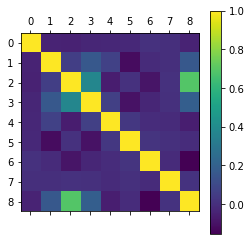

In [ ]:
plt.matshow(train.corr())
plt.colorbar()
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)

LinearRegression()

In [ ]:
train['lableenc_predicted']=reg.predict(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']])

In [ ]:
reg_score=reg.score(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)
print(reg_score)

0.0006066181924004876


In [ ]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,predicted,lableenc_predicted
0,8949,city_103,0.920,Male,1,2,0,5,20,74.5,5,1,36,66.434213,66.877306
1,29725,city_40,0.776,Male,0,2,0,5,15,74.5,5,4,47,63.435382,64.269312
2,11561,city_21,0.624,Not disclosed,0,0,0,5,5,74.5,5,0,83,64.413954,64.661957
3,33241,city_115,0.789,Not disclosed,0,2,0,1,1,74.5,5,0,52,64.789982,63.789334
4,666,city_162,0.767,Male,1,2,2,5,20,74.5,1,4,8,65.240778,66.346570


In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
paramaters={
    'max_depth':[30,50,70,90,100],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
treemodel = RandomizedSearchCV(tree.DecisionTreeClassifier(),param_distributions=paramaters,cv=10)
treemodel.fit(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [30, 50, 70, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2']})

In [ ]:
treemodel.best_score_

0.009950852807999584

In [ ]:
treemodel.best_estimator_

DecisionTreeClassifier(max_depth=30, max_features='auto')

In [ ]:
treemodel =tree.DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt')
treemodel.fit(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt')

In [ ]:
train['tree_lableenc_predicted']=treemodel.predict(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']])

In [ ]:
train.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,predicted,lableenc_predicted,tree_lableenc_predicted
0,8949,city_103,0.920,Male,1,2,0,5,20,74.5,5,1,36,66.434213,66.877306,13
1,29725,city_40,0.776,Male,0,2,0,5,15,74.5,5,4,47,63.435382,64.269312,47
2,11561,city_21,0.624,Not disclosed,0,0,0,5,5,74.5,5,0,83,64.413954,64.661957,34
3,33241,city_115,0.789,Not disclosed,0,2,0,1,1,74.5,5,0,52,64.789982,63.789334,52
4,666,city_162,0.767,Male,1,2,2,5,20,74.5,1,4,8,65.240778,66.346570,8


In [ ]:
treescore=treemodel.score(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)
print(treescore*100)

72.05258471691197


In [ ]:
lassomodel=linear_model.Lasso()
lassomodel.fit(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)

Lasso()

In [ ]:
train['lasso_lableenc_predicted']=lassomodel.predict(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']])

In [ ]:
lass_score=lassomodel.score(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)
print(lass_score*100)

0.007619049386797805


In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest=RandomForestClassifier(max_samples=0.95,random_state=42)
randomforest.fit(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)

RandomForestClassifier(max_samples=0.95, random_state=42)

In [ ]:
train['Random_lableenc_predicted']=randomforest.predict(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']])

In [ ]:
random_score=randomforest.score(train[['city_development_index','relevent_experience','enrolled_university'	,'education_level',	'major_discipline',	'experience'	,'company_size'	,'company_type','last_new_job']],train.training_hours)
print(random_score*100)

72.05258471691197


In [ ]:
train.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,predicted,lableenc_predicted,tree_lableenc_predicted,lasso_lableenc_predicted,Random_lableenc_predicted
0,8949,city_103,0.920,Male,1,2,0,5,20,74.5,5,1,36,66.434213,66.877306,13,65.559089,134
1,29725,city_40,0.776,Male,0,2,0,5,15,74.5,5,4,47,63.435382,64.269312,47,65.559089,47
2,11561,city_21,0.624,Not disclosed,0,0,0,5,5,74.5,5,0,83,64.413954,64.661957,34,65.559089,34
3,33241,city_115,0.789,Not disclosed,0,2,0,1,1,74.5,5,0,52,64.789982,63.789334,52,65.559089,52
4,666,city_162,0.767,Male,1,2,2,5,20,74.5,1,4,8,65.240778,66.346570,8,65.648146,8
5,21651,city_176,0.764,Not disclosed,1,1,0,5,11,74.5,5,1,24,66.214974,66.296275,24,65.559089,24
6,28806,city_160,0.920,Male,1,2,1,5,5,74.5,1,1,24,66.594142,68.317971,24,65.648146,24
7,402,city_46,0.762,Male,1,2,0,5,13,10,5,4,18,65.315857,65.626731,18,65.568644,18
8,27107,city_103,0.920,Male,1,2,0,5,7,74.5,5,1,46,66.572818,66.832099,17,65.559089,82
9,699,city_103,0.920,Not disclosed,1,2,0,5,17,10000,5,4,123,63.958852,64.658624,14,64.088800,88
